<a href="https://colab.research.google.com/github/monishagopal7/monishagopal7/blob/main/HW3_TripAdvisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 : Monisha Gopal, Shaheen Nazar, Thao Nguyen and Joyce Tse

# HW on Trip Advisor Reviews

This dataset is from kaggle: https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

The dataset is also available here: https://drive.google.com/file/d/1YI16G173EVpfAB9f1xRKNB_2Zwy9-AMm/view?usp=sharing



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')  # Add My Drive/<>
drive.mount('/content/gdrive', force_remount=True)

import os
os.chdir('gdrive/Shared drives')
os.chdir('NLP/Home Work/HW3')
#os.chdir('/content/gdrive/Shareddrives/NLP/Home Work/HW3')
#drive.mount('/content/gdrive', force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
%load_ext rpy2.ipython

In [4]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
print(df.columns)
print("No of observations =", len(df))
df.head()

Index(['Review', 'Rating'], dtype='object')
No of observations = 20491


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.shape

(20491, 2)

In [6]:
df.groupby(['Rating']).count()

,Review
Rating,
1,1421
2,1793
3,2184
4,6039
5,9054


## Question 1 [2 points]

1. Using the [Harvard Inquirer Dictionary](http://www.wjh.harvard.edu/~inquirer/inqdict.txt), count the number of positive and negative words in each review. Add two columns to the dataset, one for the count of positive words and the other for the count of negative words. 

2. Show the histogram of these word count columns. 

(You may want to stem the words in the Review column and those in inqdict before you match them and count words. Why?)

In [7]:
#importing the dictionary
%%R
HIDict = readLines("inqdict.txt")
dict_pos = HIDict[grep("Pos",HIDict)]
poswords = NULL
for (s in dict_pos) {
    s = strsplit(s,"#")[[1]][1]
    poswords = c(poswords,strsplit(s," ")[[1]][1])
}
dict_neg = HIDict[grep("Neg",HIDict)]
negwords = NULL
for (s in dict_neg) {
    s = strsplit(s,"#")[[1]][1]
    negwords = c(negwords,strsplit(s," ")[[1]][1])
}

In [8]:
%%R
poswords = tolower(poswords)
poswords = unique(poswords)

negwords = tolower(negwords)
negwords = unique(negwords)

print(sample(poswords,25))
print('----')
print(sample(negwords,25))

 [1] "earnestness"   "preparatory"   "respectable"   "genial"       
 [5] "capability"    "upfront"       "sworn"         "consistency"  
 [9] "joke"          "authoritative" "generate"      "innovate"     
[13] "fun"           "calm"          "motivate"      "benevolence"  
[17] "rightful"      "rapt"          "deduce"        "inventor"     
[21] "sense"         "augment"       "verification"  "beautify"     
[25] "sprightly"    
[1] "----"
 [1] "disastrous"   "barbarian"    "touchy"       "squander"     "disrupt"     
 [6] "extinguish"   "fret"         "covert"       "unattractive" "cheater"     
[11] "ambush"       "fever"        "abandon"      "scary"        "exception"   
[16] "revenge"      "rigid"        "untruth"      "asunder"      "depose"      
[21] "cancer"       "seethe"       "opposition"   "rebut"        "severe"      


In [9]:
neg_words = %Rget negwords
neg_words = array([j for j in neg_words])
print(len(neg_words))
print(neg_words[:15])

2121
['entryword' 'abandon' 'abandonment' 'abate' 'abdicate' 'abhor' 'abject'
 'abnormal' 'abolish' 'abominable' 'abrasive' 'abrupt' 'abscond' 'absence'
 'absent']


In [10]:
pos_word = %Rget poswords
pos_word = array([j for j in pos_word])
print(len(pos_word))
print(pos_word[:15])

1647
['entryword' 'abide' 'able' 'abound' 'absolve' 'absorbent' 'absorption'
 'abundance' 'abundant' 'accede' 'accentuate' 'accept' 'acceptable'
 'acceptance' 'accessible']


In [11]:
#stemming function
import re
import nltk
nltk.download('stopwords')
!pip install krovetzstemmer
from krovetzstemmer import Stemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
def stem_tokenizer(text):
    stemmer = Stemmer(ignore_stopwords=True)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words 

In [13]:
df['Review_stemmed'] = df['Review'].apply(lambda x: stem_tokenizer(x)) # Stem every word.

In [14]:
df.iloc[1]

Review            ok nothing special charge diamond member hilto...
Rating                                                            2
Review_stemmed    [ok, nothing, special, charge, diamond, member...
Name: 1, dtype: object

In [15]:
stemmer = Stemmer(ignore_stopwords=True)
stemmed_pos = [stemmer.stem(word) for word in pos_word]
stemmed_neg = [stemmer.stem(word) for word in neg_words]

In [16]:
def calculate_sum(x, word):
  count = 0
  for i in range (len(x)):
    if x[i] in word:
      count += 1
  return count

In [17]:
df['Positive'] = df['Review_stemmed'].apply(lambda x : calculate_sum(x,stemmed_pos))
df['Negative'] = df['Review_stemmed'].apply(lambda x : calculate_sum(x,stemmed_neg))

(0.0, 10640.0)

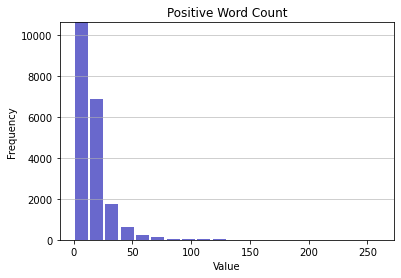

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['Positive'], bins=20, color='#0504aa',
                            alpha=0.6, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Positive Word Count')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [19]:
df.sort_values(by='Positive', ascending=False).head(10)

,Review,Rating,Review_stemmed,Positive,Negative
7072,honest review visit 5/21-5/28 let begin saying...,3,"[honest, review, visit, 5, 21-5, 28, let, begi...",261,224
17777,"fantastic return trip, firstly apology length ...",5,"[fantastic, return, trip, firstly, apology, le...",254,191
13003,awesome vacation sirenis punta cana arrival fl...,5,"[awesome, vacation, sireni, punta, cana, arriv...",212,197
7049,"false start good vacation secrets__Ç, false st...",5,"[false, start, good, vacation, secret, false, ...",205,213
17800,wanted know afraid ask just 10 short days ago ...,4,"[want, know, afraid, ask, just, 10, short, day...",192,159
18911,vacation make husband stayed ocean blue septem...,3,"[vacation, make, husband, stay, ocean, blue, s...",189,128
3727,"wed bambu, husband married riu bambu 18th 2006...",4,"[wed, bambu, husband, married, riu, bambu, 18t...",181,134
2967,bravo bavaro knew not five-star hotel incredib...,4,"[bravo, bavaro, knew, not, five-star, hotel, i...",180,138
6821,relaxing great time husband stayed sunscape ap...,4,"[relaxing, great, time, husband, stay, sunscap...",178,155
20111,concerns not warranted breezes 25 years old ju...,4,"[concern, not, warrant, breeze, 25, years, old...",177,154


(0.0, 14370.0)

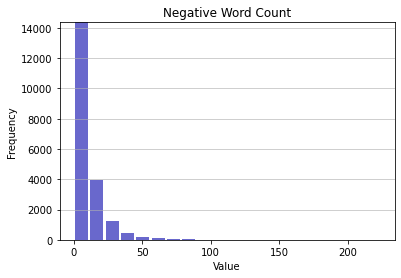

In [20]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df['Negative'], bins=20, color='#0504aa',
                            alpha=0.6, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Negative Word Count')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [21]:
df.sort_values(by='Negative', ascending=False).head(10)

,Review,Rating,Review_stemmed,Positive,Negative
7072,honest review visit 5/21-5/28 let begin saying...,3,"[honest, review, visit, 5, 21-5, 28, let, begi...",261,224
7049,"false start good vacation secrets__Ç, false st...",5,"[false, start, good, vacation, secret, false, ...",205,213
13003,awesome vacation sirenis punta cana arrival fl...,5,"[awesome, vacation, sireni, punta, cana, arriv...",212,197
17777,"fantastic return trip, firstly apology length ...",5,"[fantastic, return, trip, firstly, apology, le...",254,191
17800,wanted know afraid ask just 10 short days ago ...,4,"[want, know, afraid, ask, just, 10, short, day...",192,159
6821,relaxing great time husband stayed sunscape ap...,4,"[relaxing, great, time, husband, stay, sunscap...",178,155
20111,concerns not warranted breezes 25 years old ju...,4,"[concern, not, warrant, breeze, 25, years, old...",177,154
2962,"bavaro princess- incredible environment, overa...",4,"[bavaro, princess-, incredible, environment, o...",175,152
17953,"great value great resort, family party hubbie ...",4,"[great, value, great, resort, family, party, h...",174,142
2967,bravo bavaro knew not five-star hotel incredib...,4,"[bravo, bavaro, knew, not, five-star, hotel, i...",180,138


## Train and Test datasets [1 point]

Create these datasets once and save them for use in answering the 3 questions that follow. 

Use a 80:20 train-test split. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
Y = df['Rating']
X = df[['Review', 'Positive', 'Negative']].copy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Question 2 [2 points]

1. Fit a multi-category machine learning model to the data using only the two new columns you created as features and the Rating column as the label. 

2. Report the confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient, ROC curve, and the AUC. Report these values on the train and test datasets. 

(Think about how you would like to manage the two features. Do you want to express them as a percentage of total words in the review? Do you want to normalize the columns by scaling?)

<h3> Baseline Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
X_train_Q2 = X_train[['Positive', 'Negative']]
X_test_Q2 = X_test[['Positive', 'Negative']]

In [27]:
clf=RandomForestClassifier()
clf.fit(X_train_Q2, y_train)

RandomForestClassifier()

In [28]:
y_pred_Q2 = clf.predict(X_test_Q2)

<h4> Metrics </h4>
- https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, y_pred_Q2,  labels = [1, 2, 3, 4, 5])

array([[ 112,   74,   15,   43,   48],
       [  78,   69,   32,   67,   87],
       [  40,   43,   29,  129,  191],
       [  32,   45,   40,  236,  899],
       [  22,   38,   27,  235, 1468]])

- The first column represents the reviews with a 1 rating, the second column represents the reviews with an 2* rating, and the third column 3* rating and so forth. 
- The numbers on the diagonal of the matrix, 119, 73, and 34, 232, 1483 represent the number of reviews the model has accurately classified.

In [30]:
print(classification_report(y_test, y_pred_Q2))

              precision    recall  f1-score   support

           1       0.39      0.38      0.39       292
           2       0.26      0.21      0.23       333
           3       0.20      0.07      0.10       432
           4       0.33      0.19      0.24      1252
           5       0.55      0.82      0.65      1790

    accuracy                           0.47      4099
   macro avg       0.35      0.33      0.32      4099
weighted avg       0.41      0.47      0.42      4099



In [31]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred_Q2))

0.18708672664363016


In [32]:
#ROC AUC Score
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_preb_probs_Q2 = clf.predict_proba(X_test_Q2)

roc_auc_score(y_test, y_preb_probs_Q2, average="weighted", multi_class="ovr" )

0.6775459334943486

<h3> Optimized Model

#MG

## Question 3 [2 points]

1. Fit a multi-category machine learning model to the data using only the Review column as features and the Rating column as the label. 

2. Report the confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient, ROC curve, and the AUC. 

(Think about how you would like to manage the text column. Do you want to remove numbers, punctuation, stopwords, and do stemming?)

What framework did you choose? (lots of choices: Fasttext, spaCy, AutoGluon, TensorFlow, PyTorch, GLMnet, sklearn, etc.)

In [33]:
!pip install --upgrade pip
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from autogluon.tabular import  TabularPredictor

In [38]:
df_Q3_b= df[[ 'Review', 'Rating']]

In [39]:
df_Q3_b

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [40]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_Q3_b, test_size=0.2, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

Train size = (16392, 2)  | Test size = (4099, 2)


In [41]:
#from nltk.util import pr
predictor = TabularPredictor(label='Rating').fit(train_data=train_data)
performance = predictor.evaluate(train_data)

n_classes = np.sort(df['Rating'].unique())

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221011_063047/"
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ...
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221011_063047/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    16392
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 1
INFO:autogluon.tabular.learner.default_learner:Label Column: Rating
INFO:autogluon.tabular.learner.default_learner:Preprocessing data ...
Level 25:autogluon.core.utils.utils:AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
INFO:autogluo

In [42]:
# TEST OUT-OF-SAMPLE

y_test = test_data['Rating']
test_data_nolabel = test_data.drop(labels=['Rating'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
y_prob = predictor.predict(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: accuracy on test data: 0.6335691632105391
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "accuracy": 0.6335691632105391,
    "balanced_accuracy": 0.5165528847725781,
    "mcc": 0.45186858620193104
}


In [44]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,\
                            classification_report,matthews_corrcoef,\
                            roc_curve,auc,precision_score,recall_score,f1_score

In [45]:
def multiclass_roc_auc_curve(y_test, predicted, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in n_classes:
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i-1], predicted[:,i-1])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in n_classes:
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.05])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUC-ROC curve for rating ' + str(i))
        plt.legend(loc="lower right")
        plt.show()   

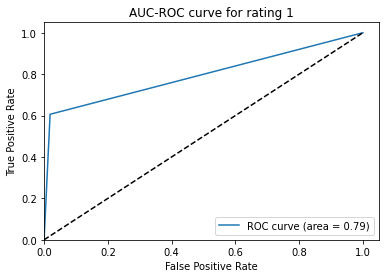

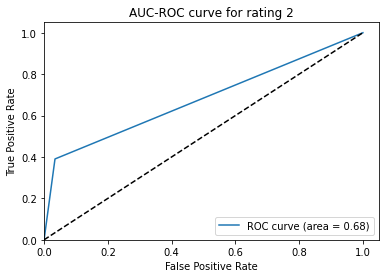

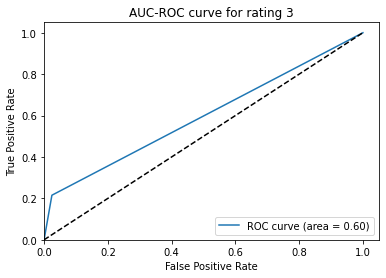

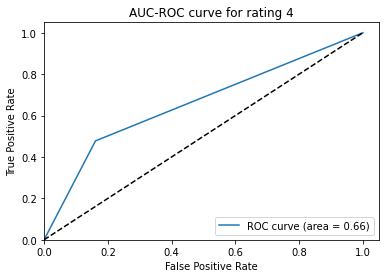

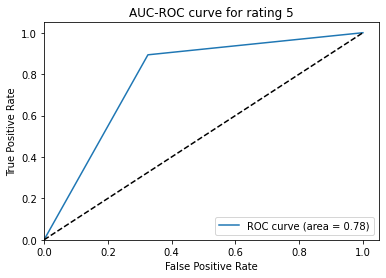

In [47]:
# ROC and AUC for question3
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_curve, auc


y2_test_labels = label_binarize(y_test, classes=n_classes)
y2_pred_labels = label_binarize(y_pred, classes=n_classes)
multiclass_roc_auc_curve(y2_test_labels, y2_pred_labels, n_classes)

In [48]:
# Confusion matrix
print(confusion_matrix(y_pred, y_test))

[[ 177   59   12    1    0]
 [  65  130   51   11    2]
 [   5   49   93   33    3]
 [  18   54  201  598  186]
 [  27   41   75  609 1599]]


In [51]:
print('Predictive performance on given data: accuracy score = 0.8186310395314788,')
print('Evaluations on test data: accuracy score = 0.6335691632105391')
# For confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient are already mentioned above.

Predictive performance on given data: accuracy score = 0.8186310395314788,
Evaluations on test data: accuracy score = 0.6335691632105391


## Question 4 [3 points]

Now try and use the two new columns and the Review column to build a model that uses both, the text and the positive/negative scores to construct a model. 

Report the confusion matrix, accuracy, precision, recall, f1 score, Matthews correlation coefficient, ROC curve, and the AUC.

In [53]:
#TRAIN THE MODEL2
df_q4 = df[['Review', 'Rating', 'Positive', 'Negative']]
train_data2, test_data2 = train_test_split(df_q4, test_size=0.2, random_state=42)

predictor2 = TabularPredictor(label='Rating').fit(train_data=train_data2)#, hyperparameters='multimodal'

# predictor = task.fit(train_data=train_data, label='Label')
performance2 = predictor2.evaluate(train_data2)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221011_074226/"
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ...
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221011_074226/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.14
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    16392
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 3
INFO:autogluon.tabular.learner.default_learner:Label Column: Rating
INFO:autogluon.tabular.learner.default_learner:Preprocessing data ...
Level 25:autogluon.core.utils.utils:AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
INFO:autogluo

In [58]:
df.head(2)

,Review,Rating,Review_stemmed,Positive,Negative
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary, arrive, late, evening, took, advice, previous, review, did, valet, parking, check, quick, easy, little, disappointed, non-existent, view, room, room, clean, nice, size, bed, comfortable, woke, stiff, neck, high, pillow, not, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, close, hear, people, talk, hallway, maybe, just, noisy, neighbor, aveda, bath, product, nice, did, not, goldfish, stay, nice, touch, taken, advantage, stay, long, location, great, walking, distance, shop, overall,...",18,5
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished h...",2,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle, start, book, suite, paid, extra, website, description, not, suite, bedroom, bathroom, standard, hotel, room, took, print, reservation, desk, show, said, things, like, tv, couch, ect, desk, clerk, told, oh, mixed, suite, description, kimpton, website, sorry, free, breakfast, got, kid, embassy, suit, sitting, room, bathroom, bedroom, unlike, kimpton, call, suite, 5, day, stay, offer, correct, false, advertising, send, kimpton, prefer, guest, website, email, ask, failure, provide, suite, ...",32,30


In [54]:
# TEST OUT-OF-SAMPLE

y_test = test_data2['Rating']
test_data_nolabel = test_data2.drop(labels=['Rating'],axis=1)
y_pred = predictor2.predict(test_data_nolabel)
y_prob = predictor2.predict(test_data_nolabel)
perf = predictor2.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: accuracy on test data: 0.6406440595267139
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "accuracy": 0.6406440595267139,
    "balanced_accuracy": 0.5335065098281891,
    "mcc": 0.46545251496249046
}


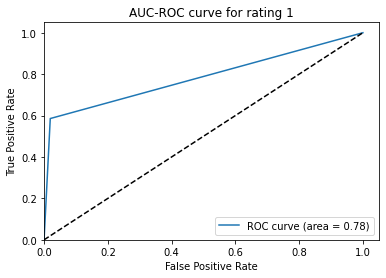

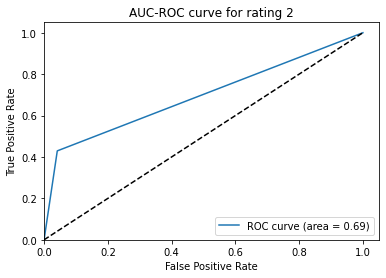

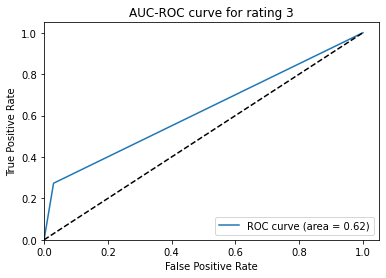

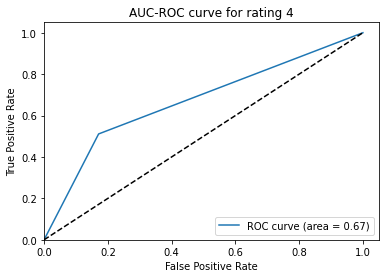

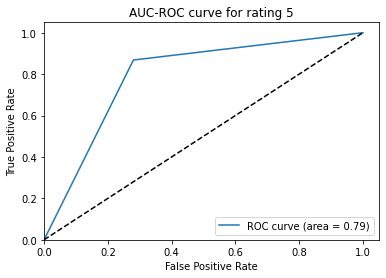

In [55]:
# ROC and AUC for question4
y3_test_labels = label_binarize(y_test, classes=n_classes)
y3_pred_labels = label_binarize(y_pred, classes=n_classes)
multiclass_roc_auc_curve(y3_test_labels, y3_pred_labels, n_classes)

In [56]:
# Confusion matrix
print(confusion_matrix(y_pred, y_test))

[[ 171   56   13    3    2]
 [  83  143   55   14    4]
 [   8   59  118   39    3]
 [  14   50  196  640  227]
 [  16   25   50  556 1554]]


In [59]:
print('Predictive performance on given data: accuracy :0.8559663250366032 ')
print('Evaluations on test data: accuracy:0.6406440595267139 ')

Predictive performance on given data: accuracy :0.8559663250366032 
Evaluations on test data: accuracy:0.6406440595267139 


MG- ignore

In [ ]:
with open('inqdict.txt') as f:
    lines = f.readlines()

In [ ]:
lines